In [1]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("chemical.csv")
print(df.shape)
print(df.head)

(14009, 62)
<bound method NDFrame.head of        Y.ECH.yectij201.pv//ALC TO J-201A/B/C TEMP._PV  \
0                                           24.811935   
1                                           24.697097   
2                                           24.567742   
3                                           24.454839   
4                                           24.312581   
...                                               ...   
14004                                       28.175484   
14005                                       28.880000   
14006                                       28.433871   
14007                                       28.757419   
14008                                       28.979355   

       Y.ECH.yectij202.pv//CL2 TO J-202A/B/C TEMP._PV  \
0                                           48.826774   
1                                           48.785161   
2                                           48.764194   
3                                           4

In [ ]:
df_control = pd.read_csv("chemical_control_features.csv")
print(df_control.shape)

(12, 3)


In [4]:
control_tags = df_control['tag'].tolist()
positions = []
for tag in control_tags:
    try:
        idx = df.columns.get_loc(tag)
        positions.append(idx)
    except KeyError:
        positions.append(None)
df_positions = pd.DataFrame(
    {'tag': control_tags, 'column_index_0_based': positions})
df_positions

,tag,column_index_0_based
0,Y.ECH.yectice232.pv//T-222 TO E-232 INLET TEMP...,56
1,Y.ECH.yectict2210.pv//T-221 OVHD TEMP_PV,40
2,Y.ECH.YECTIT2226.PV//T-222 BOTTOM TEMP._PV,53
3,Y.ECH.yectice227b.pv//T-220B REFLUX TEMP._PV,34
4,Y.ECH.yectie2201.pv//T-220A TO E-220A TEMP._PV,17
5,Y.ECH.yectie2203.pv//T-220B TO E-220B TEMP._PV,57
6,Y.ECH.yecfics2201.pv//P-204A/B TO T-220A FLOW_PV,23
7,Y.ECH.yecfics2203.pv//P-204AB TO T-220B FLOW_PV,24
8,Y.ECH.yectice227a.pv//T-220A REFLUX TEMP._PV,58
9,Y.ECH.yectit2215.pv//T-221 BOTTOM TEMP._PV,39


C:\Users\sjy99\AppData\Local\Temp\ipykernel_9844\155996016.py:24: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


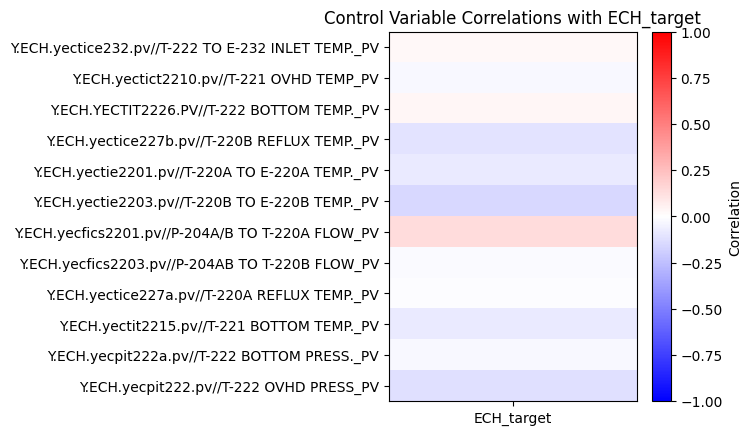

In [7]:
control_tags = df_control['tag'].tolist()

existing_tags = [tag for tag in control_tags if tag in df.columns]
missing_tags = [tag for tag in control_tags if tag not in df.columns]

corr_series = df[existing_tags].corrwith(df['ECH_target'])

corr_df = corr_series.sort_values(ascending=False).to_frame(
    name='Correlation_with_ECH_target')

fig, ax = plt.subplots(figsize=(4, 0.4 * len(corr_series)))
heatmap_data = corr_series.values.reshape(-1, 1)
im = ax.imshow(heatmap_data, cmap='bwr', vmin=-1, vmax=1, aspect='auto')

ax.set_yticks(range(len(corr_series)))
ax.set_yticklabels(corr_series.index)
ax.set_xticks([0])
ax.set_xticklabels(['ECH_target'])
ax.set_title('Control Variable Correlations with ECH_target')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Correlation')

plt.tight_layout()
plt.show()

# Corr btw ECH and WASTE

Corr: 0.030


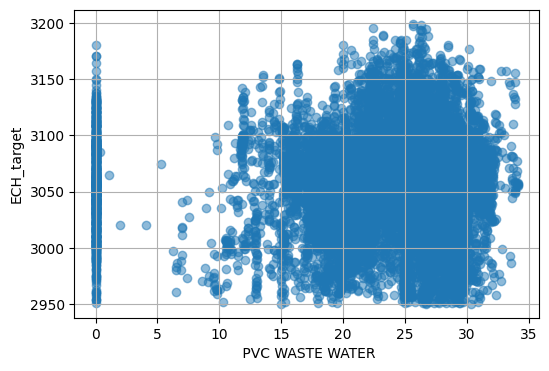

In [8]:
production_col = 'ECH_target'
waste_col = 'Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV'


corr_value = df[production_col].corr(df[waste_col])
print(f"Corr: {corr_value:.3f}")

plt.figure(figsize=(6, 4))
plt.scatter(df[waste_col], df[production_col], alpha=0.5)
plt.xlabel(' PVC WASTE WATER')
plt.ylabel('ECH_target')

plt.grid(True)
plt.show()

# Corr btw WASTE and Target

In [ ]:
control_tags = df_control['tag'].tolist()

existing_tags = [tag for tag in control_tags if tag in df.columns]
missing_tags = [tag for tag in control_tags if tag not in df.columns]

corr_series = df[existing_tags].corrwith(
    df['Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV'])

corr_df = corr_series.sort_values(ascending=False).to_frame(
    name='Correlation_with_ECH_target')

fig, ax = plt.subplots(figsize=(4, 0.4 * len(corr_series)))
heatmap_data = corr_series.values.reshape(-1, 1)
im = ax.imshow(heatmap_data, cmap='bwr', vmin=-1, vmax=1, aspect='auto')

ax.set_yticks(range(len(corr_series)))
ax.set_yticklabels(corr_series.index)
ax.set_xticks([0])
ax.set_xticklabels(['Y.ECH.yecfick204.pv//PVC WASTE WATER TO TK204_PV'])
ax.set_title('Control Variable Correlations with ECH_target')

cbar = fig.colorbar(im, ax=ax)
cbar.set_label('Correlation')

plt.tight_layout()
plt.show()